In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("heart_v2.csv")
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop('heart disease', axis = 1)
X.head()

age  sex   BP  cholestrol
0   70    1  130         322
1   67    0  115         564
2   57    1  124         261
3   64    1  128         263
4   74    0  120         269

In [9]:
y = df['heart disease']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state= 40)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth=3)

In [13]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

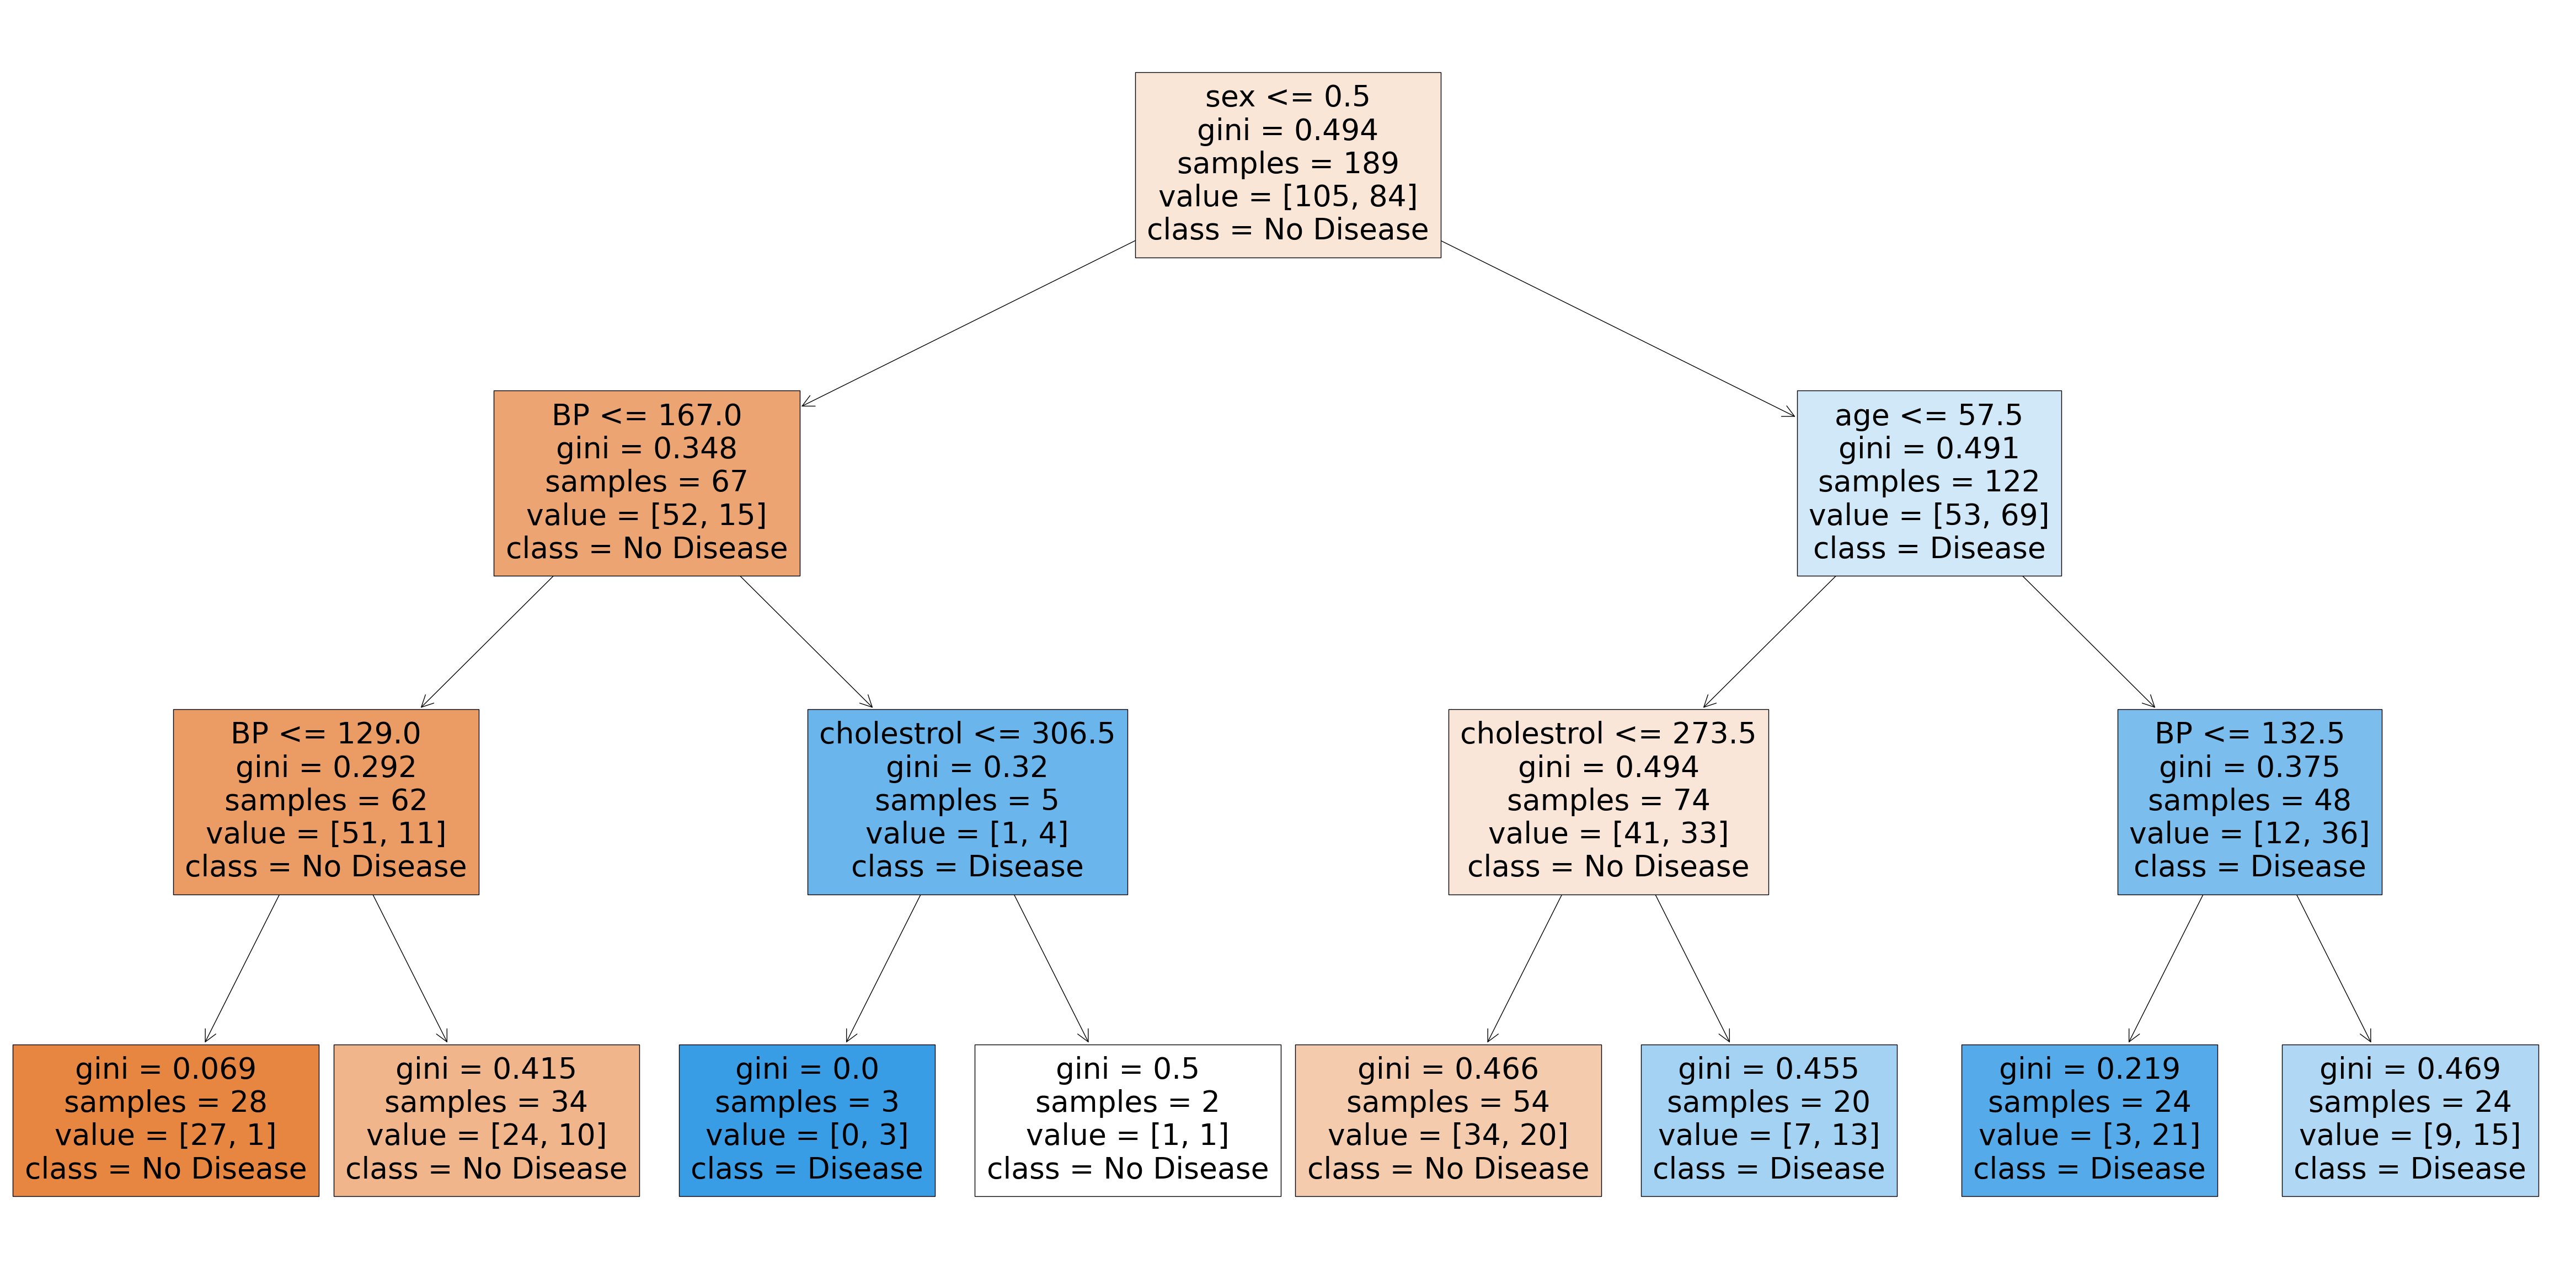

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7301587301587301


array([[86, 19],
       [32, 52]], dtype=int64)

In [19]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.691358024691358


array([[37,  8],
       [17, 19]], dtype=int64)

In [20]:
def get_dt_graph(dt_classifier):
    plt.figure(figsize=(60,30))
    plot_tree(dt_classifier,feature_names=X.columns,class_names=['No Disease','Disease'],filled=True)
    return plt.show()

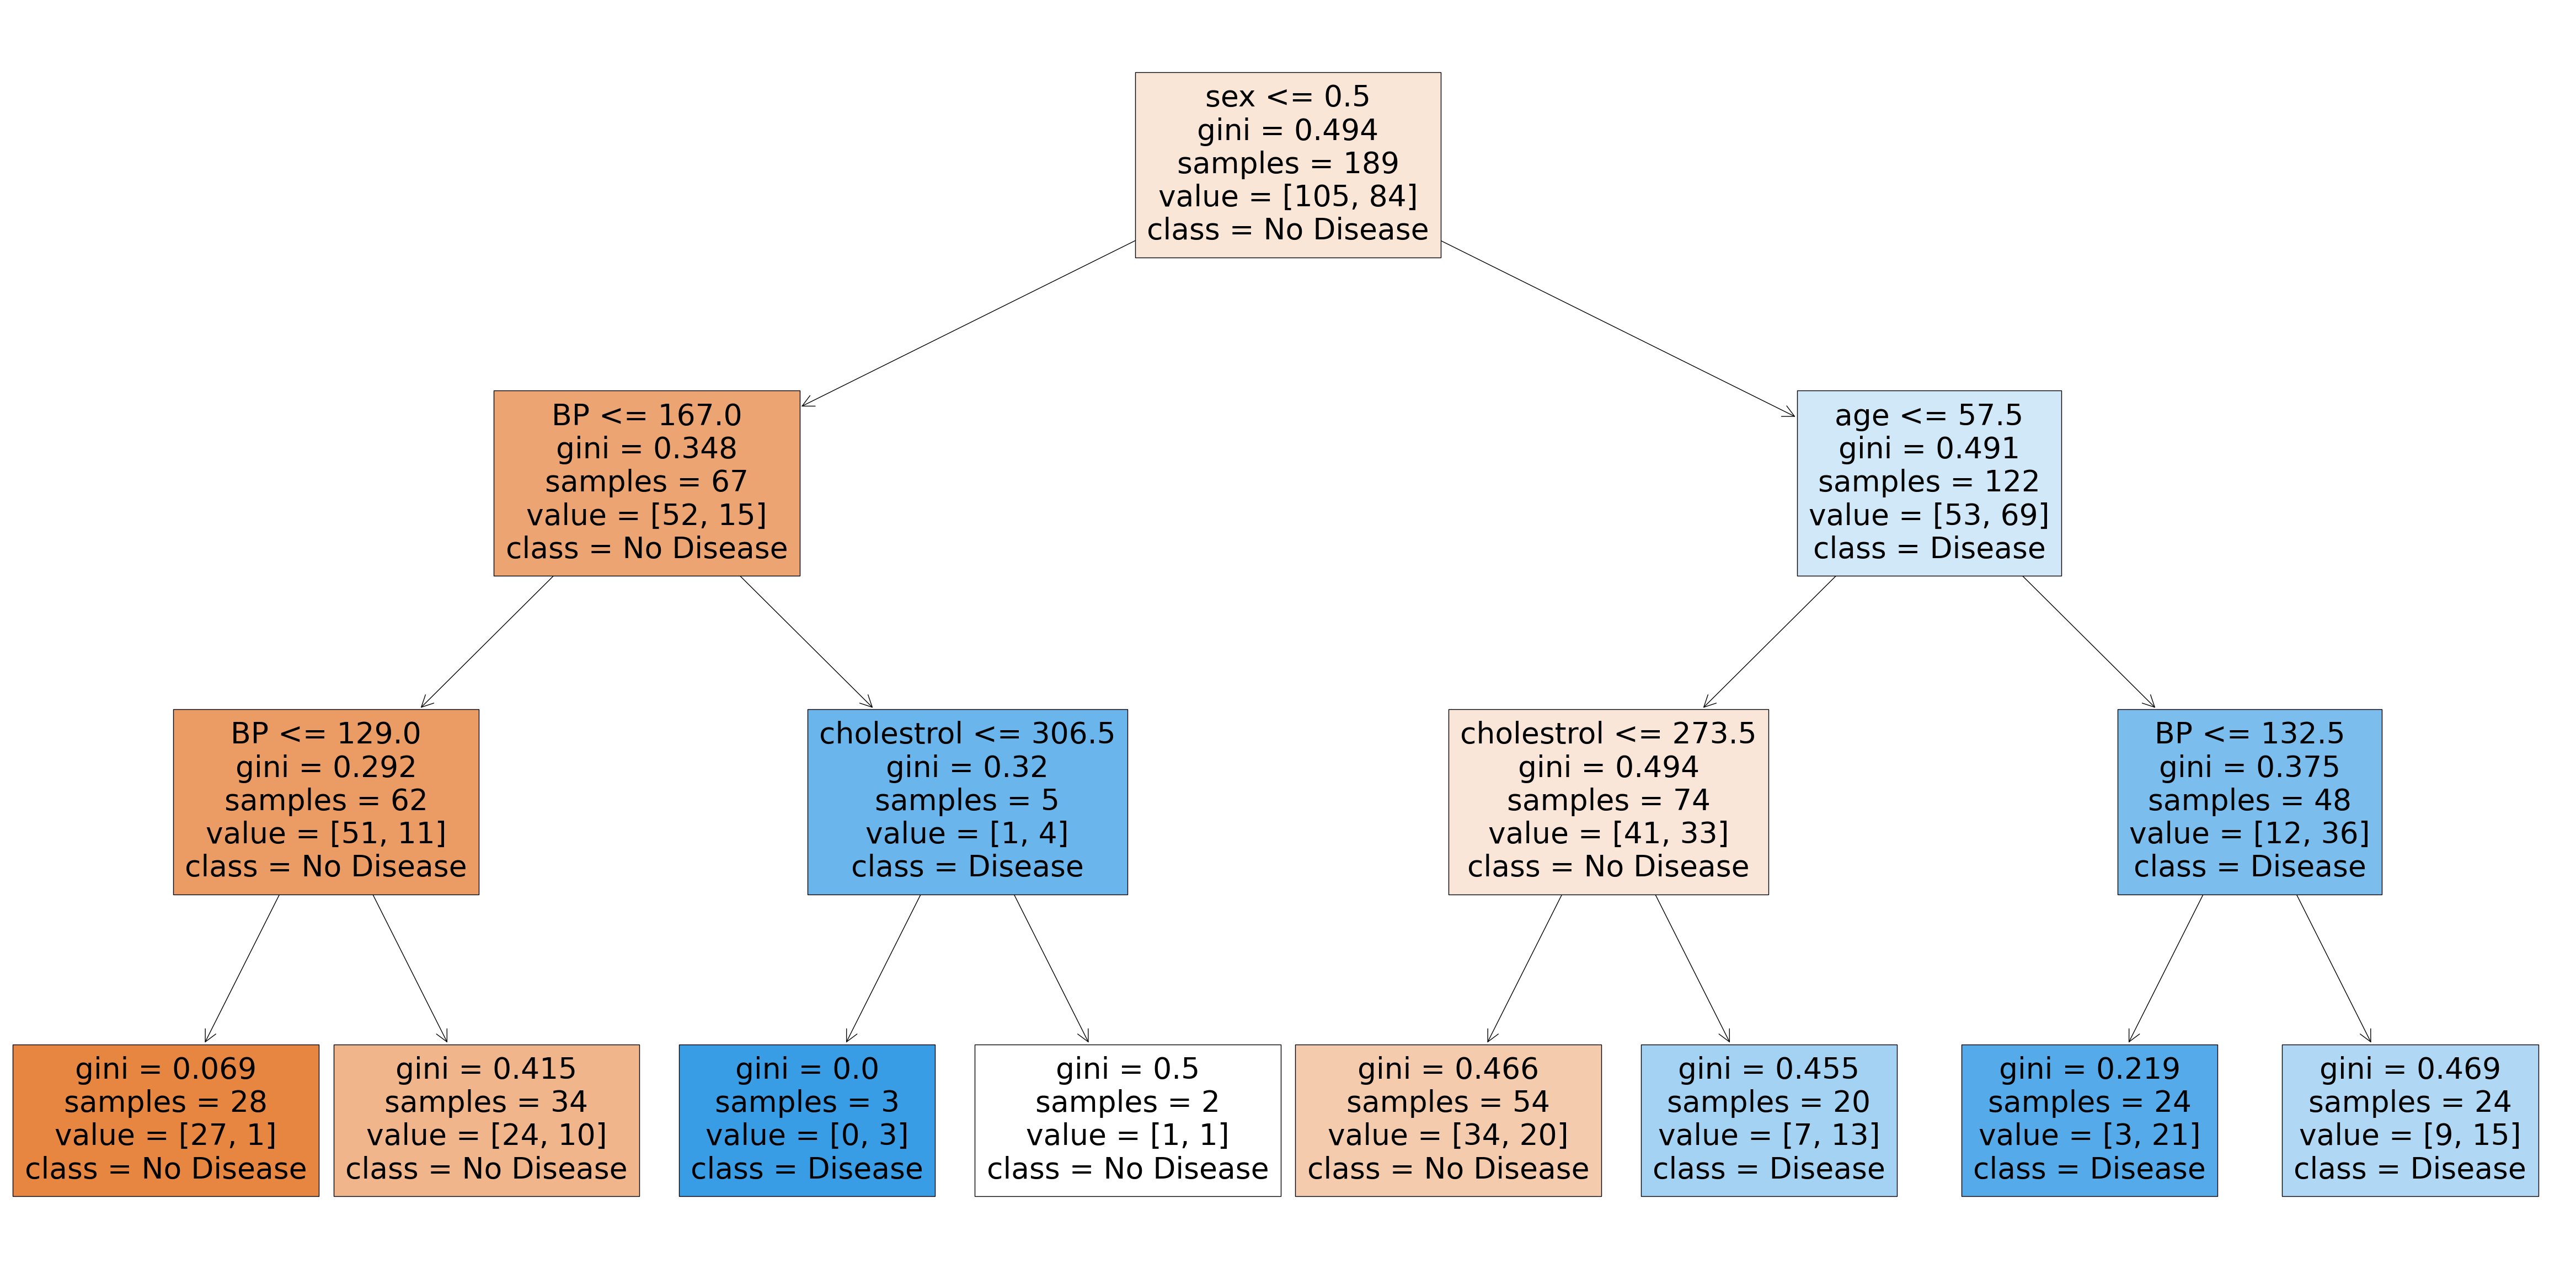

In [21]:
get_dt_graph(dt)

In [22]:
def evaluate_model(dt_classifier):
    print('Train set performance')
    print(accuracy_score(y_train,dt_classifier.predict(X_train)))
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print('-'*60)
    print('Test set performance')
    print(accuracy_score(y_test,dt_classifier.predict(X_test)))
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))
    

In [23]:
evaluate_model(dt)

Train set performance
0.7301587301587301
[[86 19]
 [32 52]]
------------------------------------------------------------
Test set performance
0.691358024691358
[[37  8]
 [17 19]]


In [24]:
dt_1 = DecisionTreeClassifier(random_state=50)
dt_1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

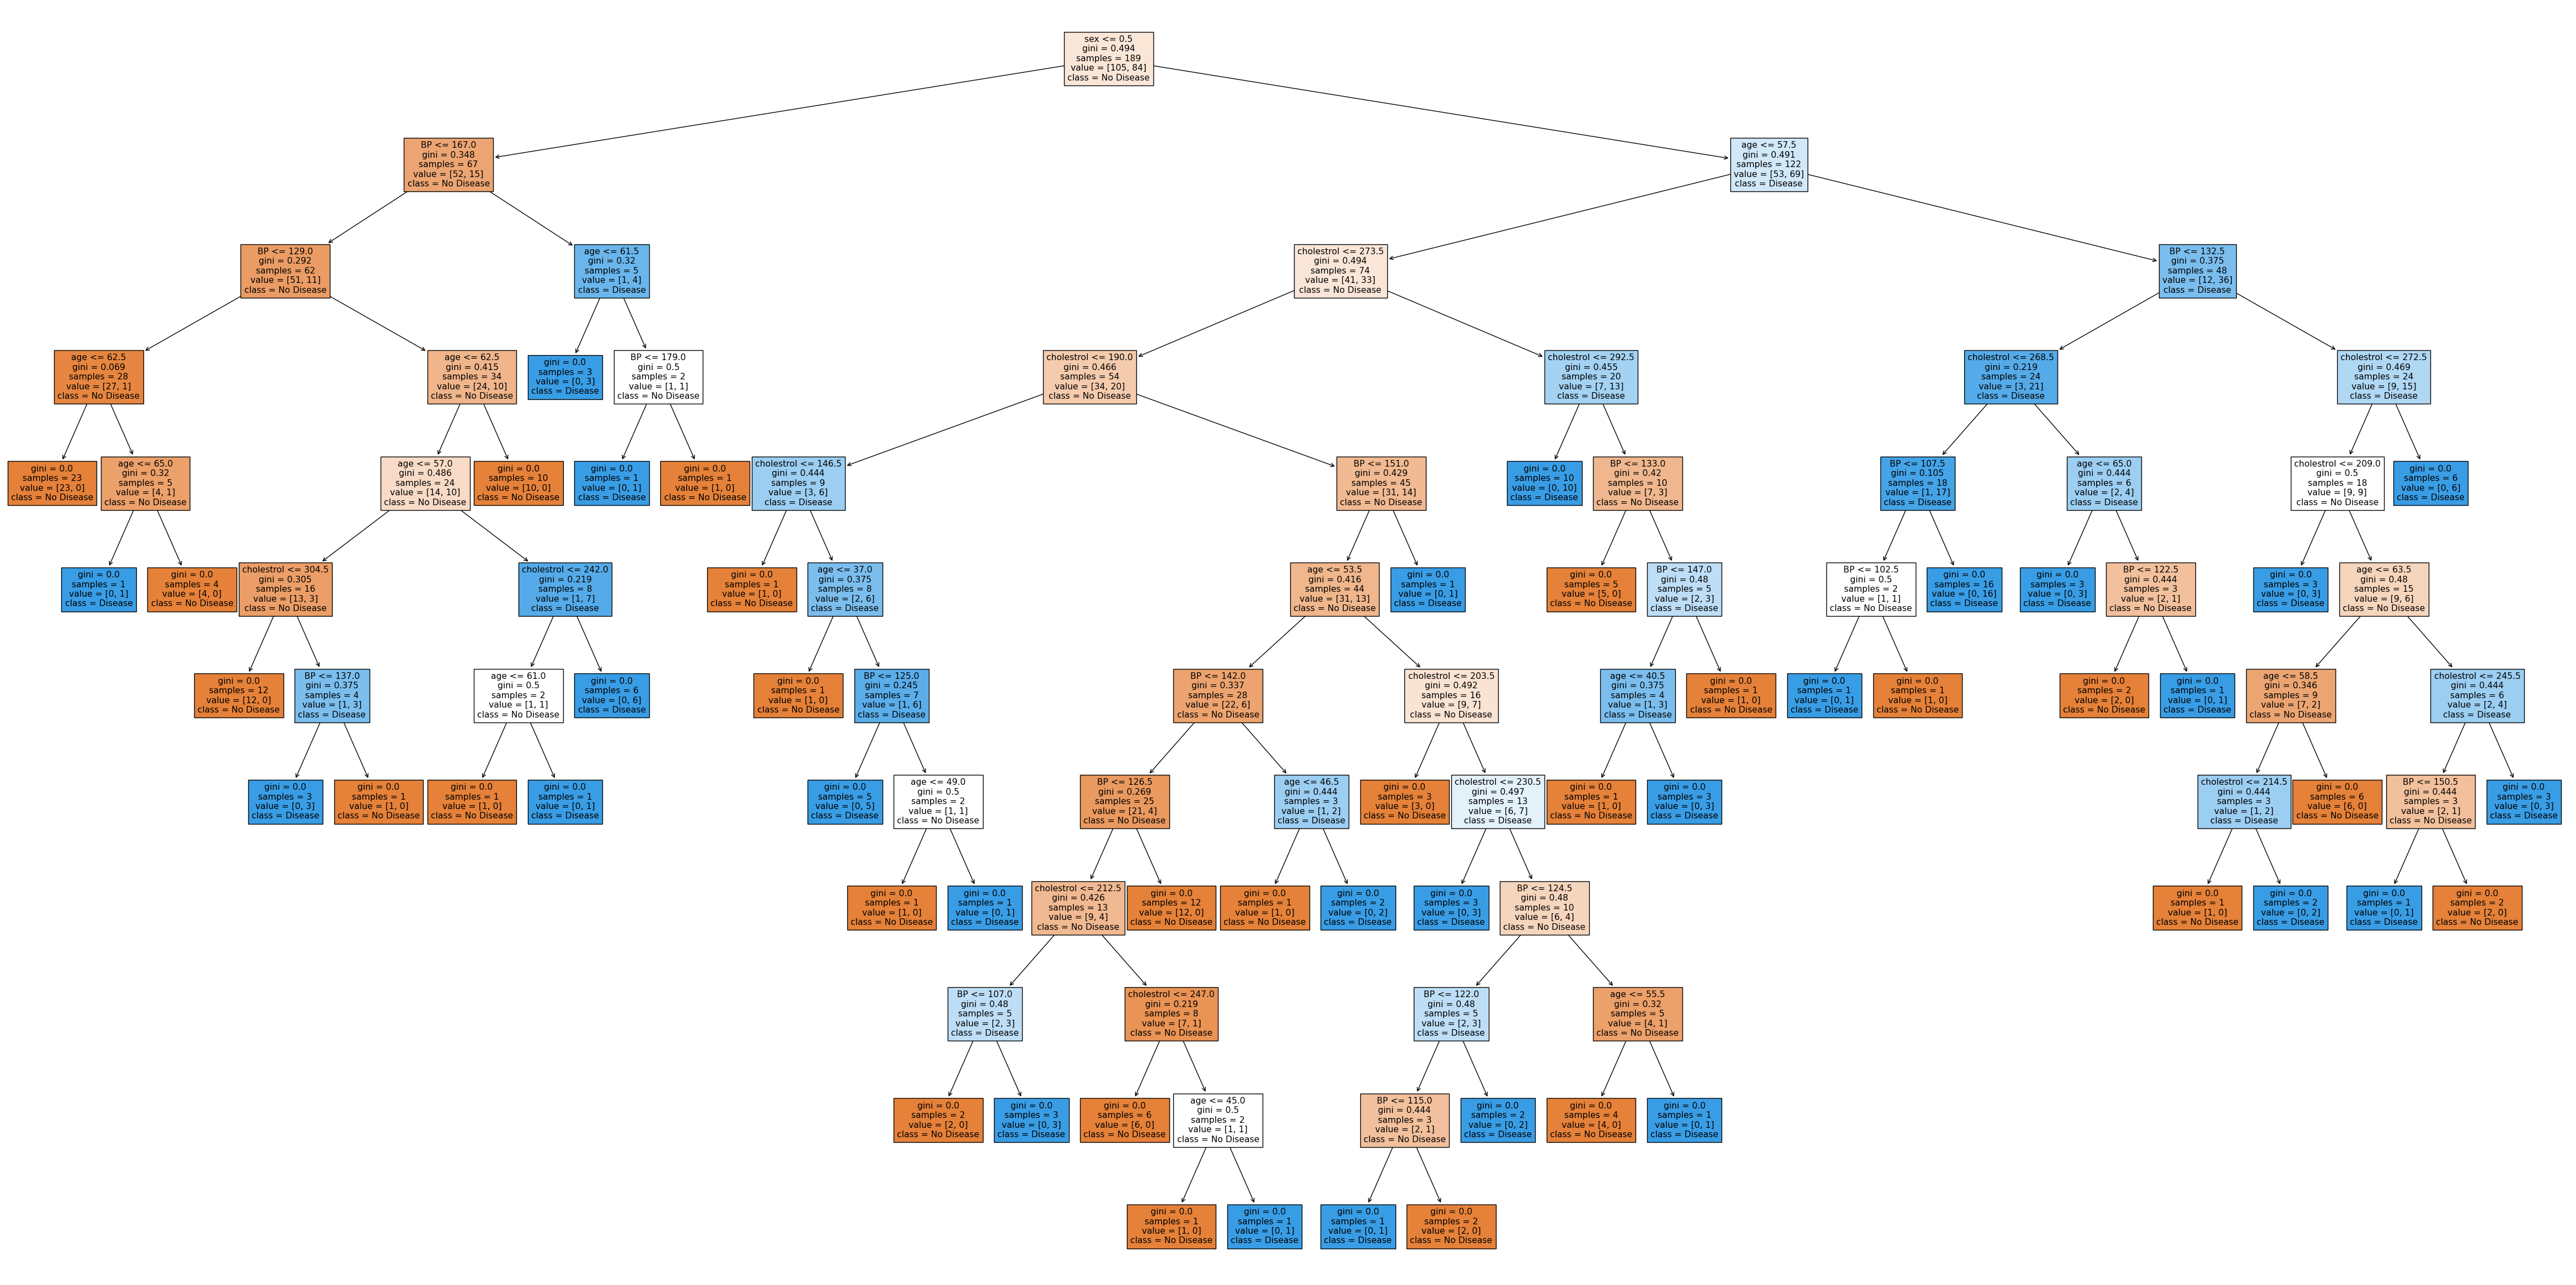

In [25]:
get_dt_graph(dt_1)

In [26]:
evaluate_model(dt_1)

Train set performance
1.0
[[105   0]
 [  0  84]]
------------------------------------------------------------
Test set performance
0.6296296296296297
[[30 15]
 [15 21]]


In [27]:
dt_2 = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

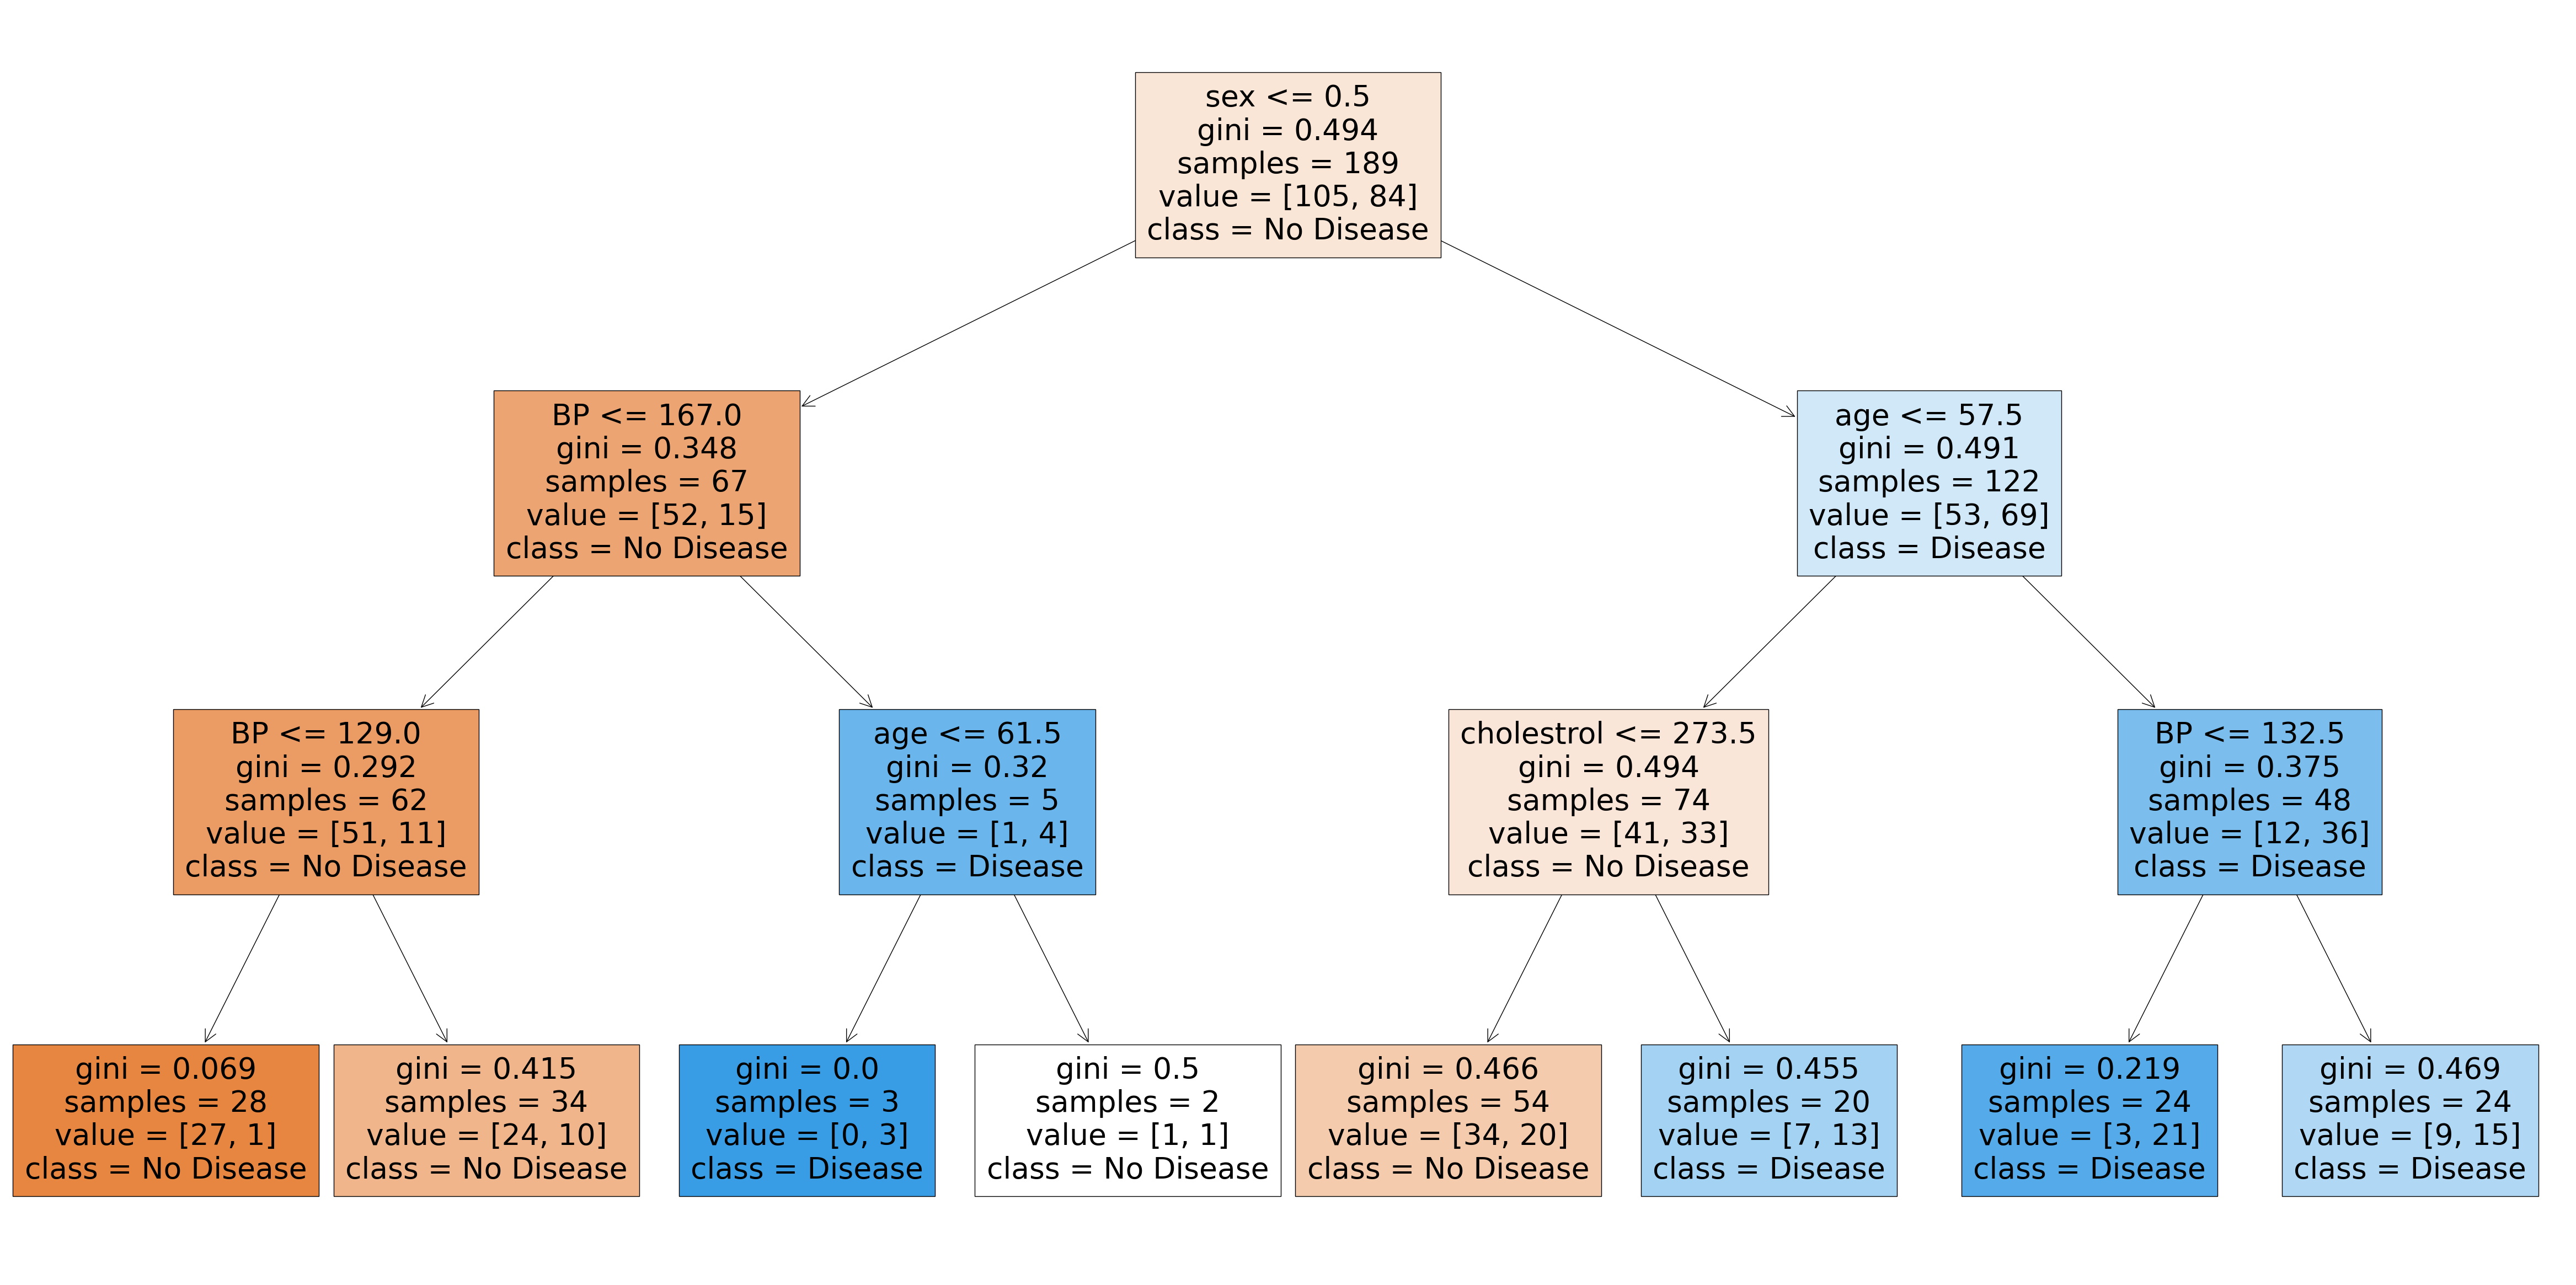

In [28]:
get_dt_graph(dt_2)

In [29]:
evaluate_model(dt_2)

Train set performance
0.7301587301587301
[[86 19]
 [32 52]]
------------------------------------------------------------
Test set performance
0.691358024691358
[[37  8]
 [17 19]]


In [30]:
dt_3 = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

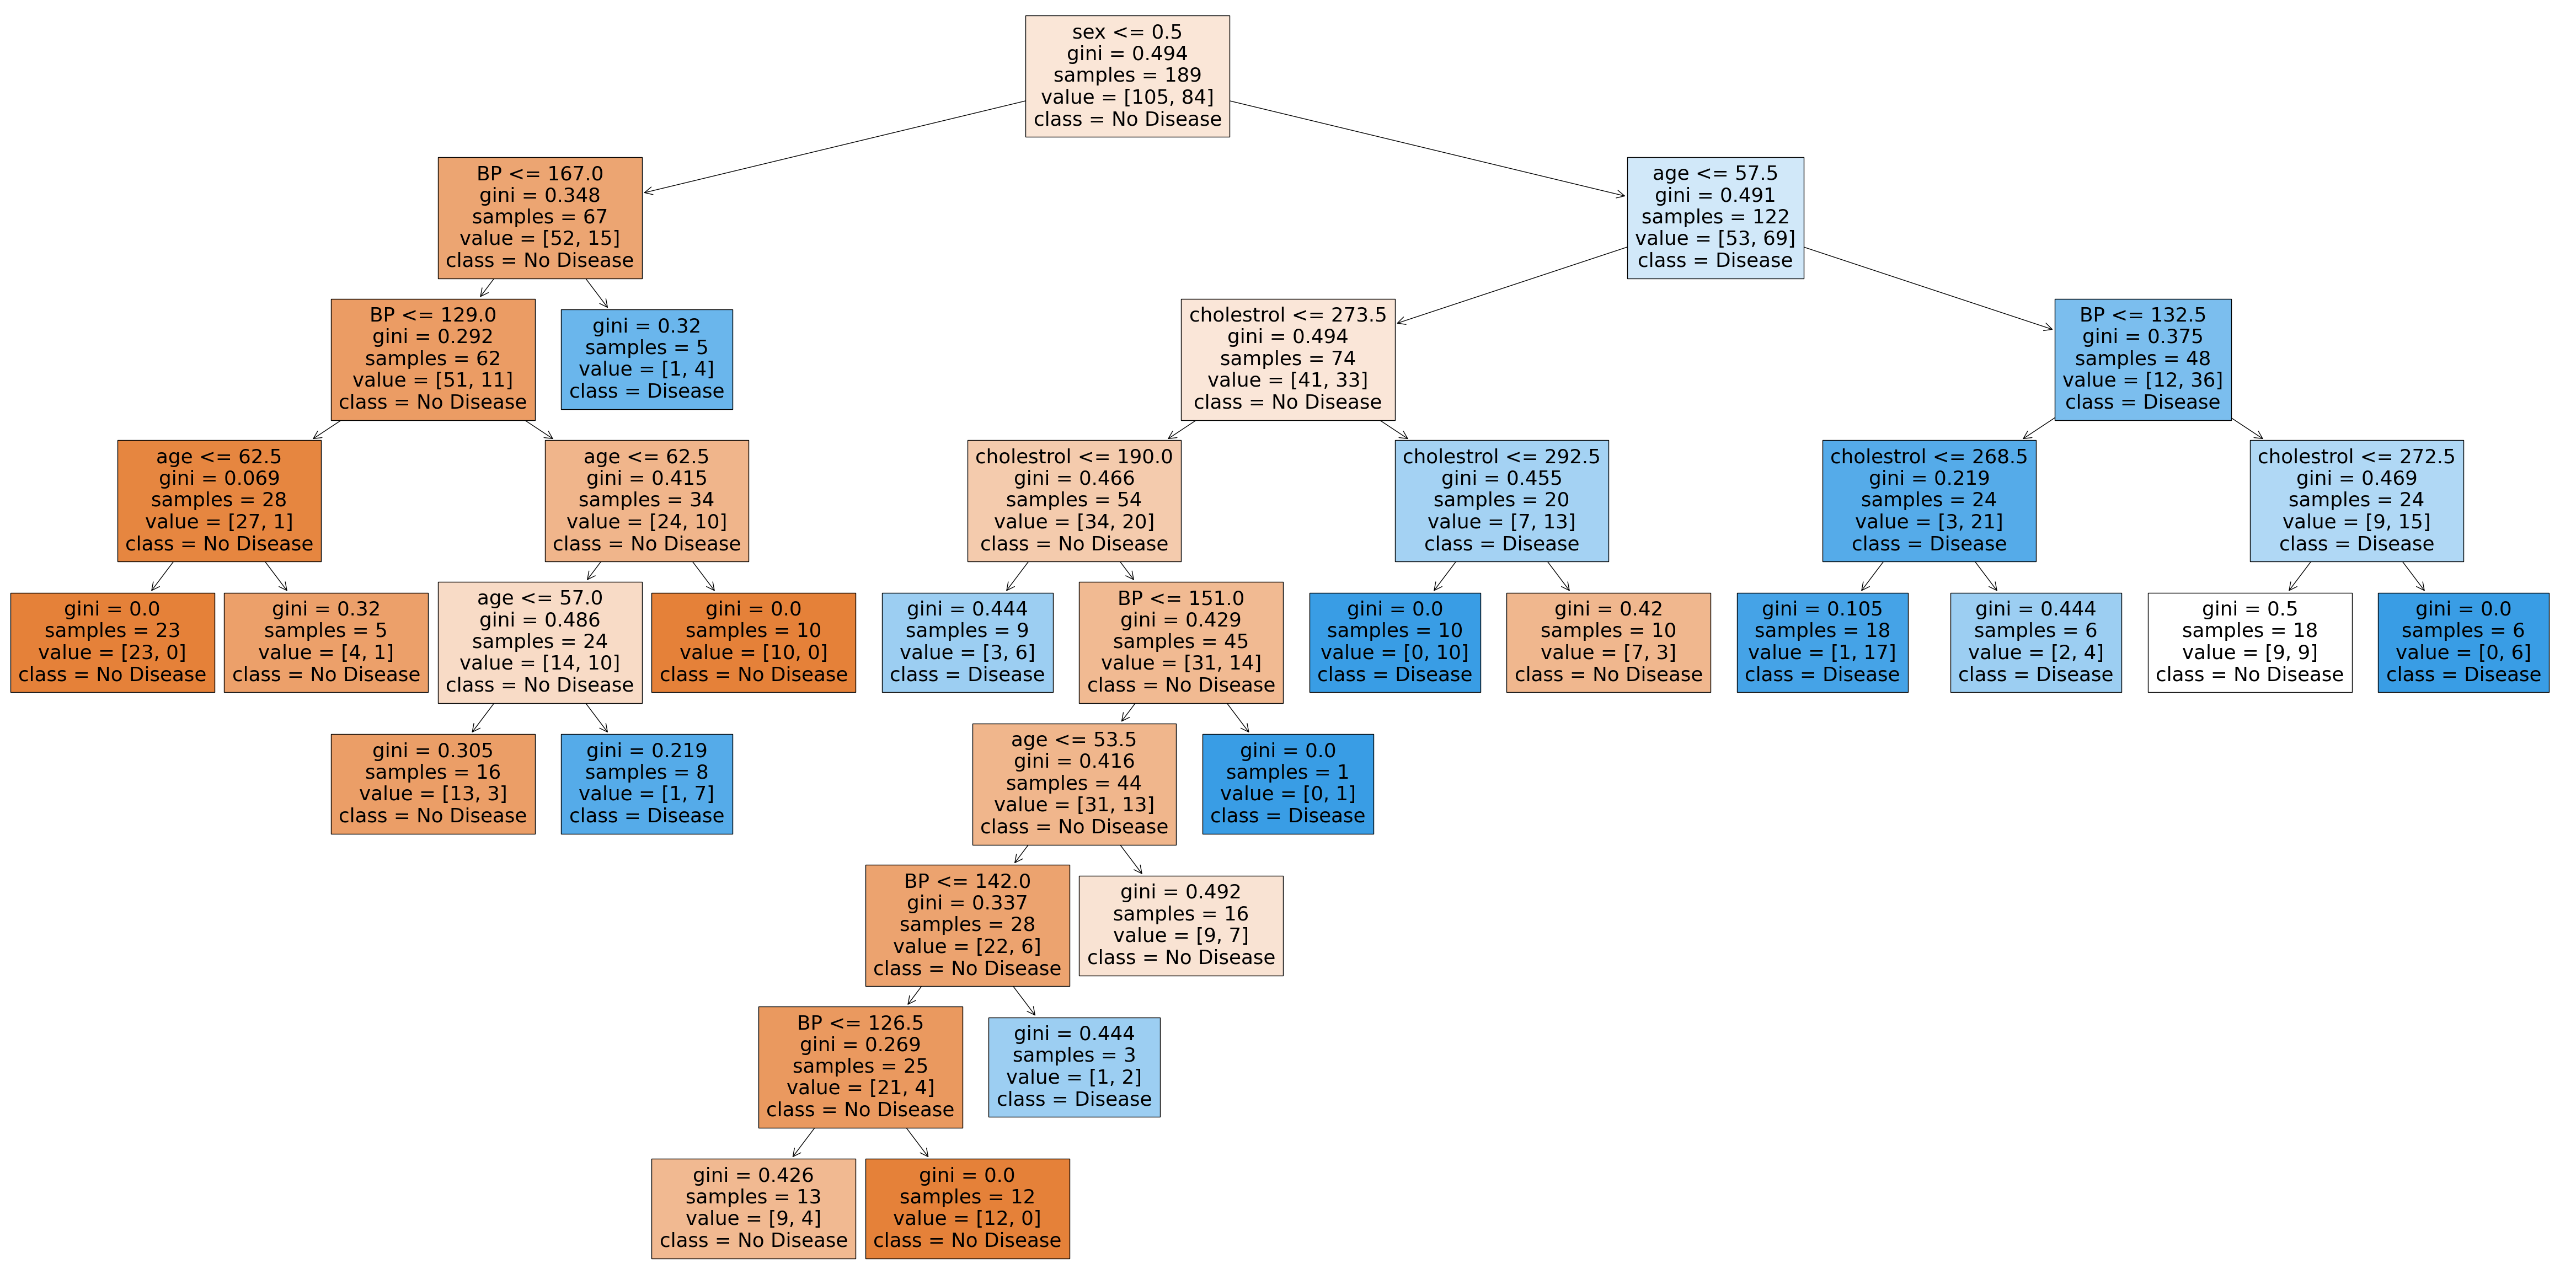

In [31]:
get_dt_graph(dt_3)

In [32]:
evaluate_model(dt_3)

Train set performance
0.8095238095238095
[[96  9]
 [27 57]]
------------------------------------------------------------
Test set performance
0.6172839506172839
[[33 12]
 [19 17]]


In [33]:
dt_4 = DecisionTreeClassifier(min_samples_leaf=20,random_state=40)
dt_4.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=40)

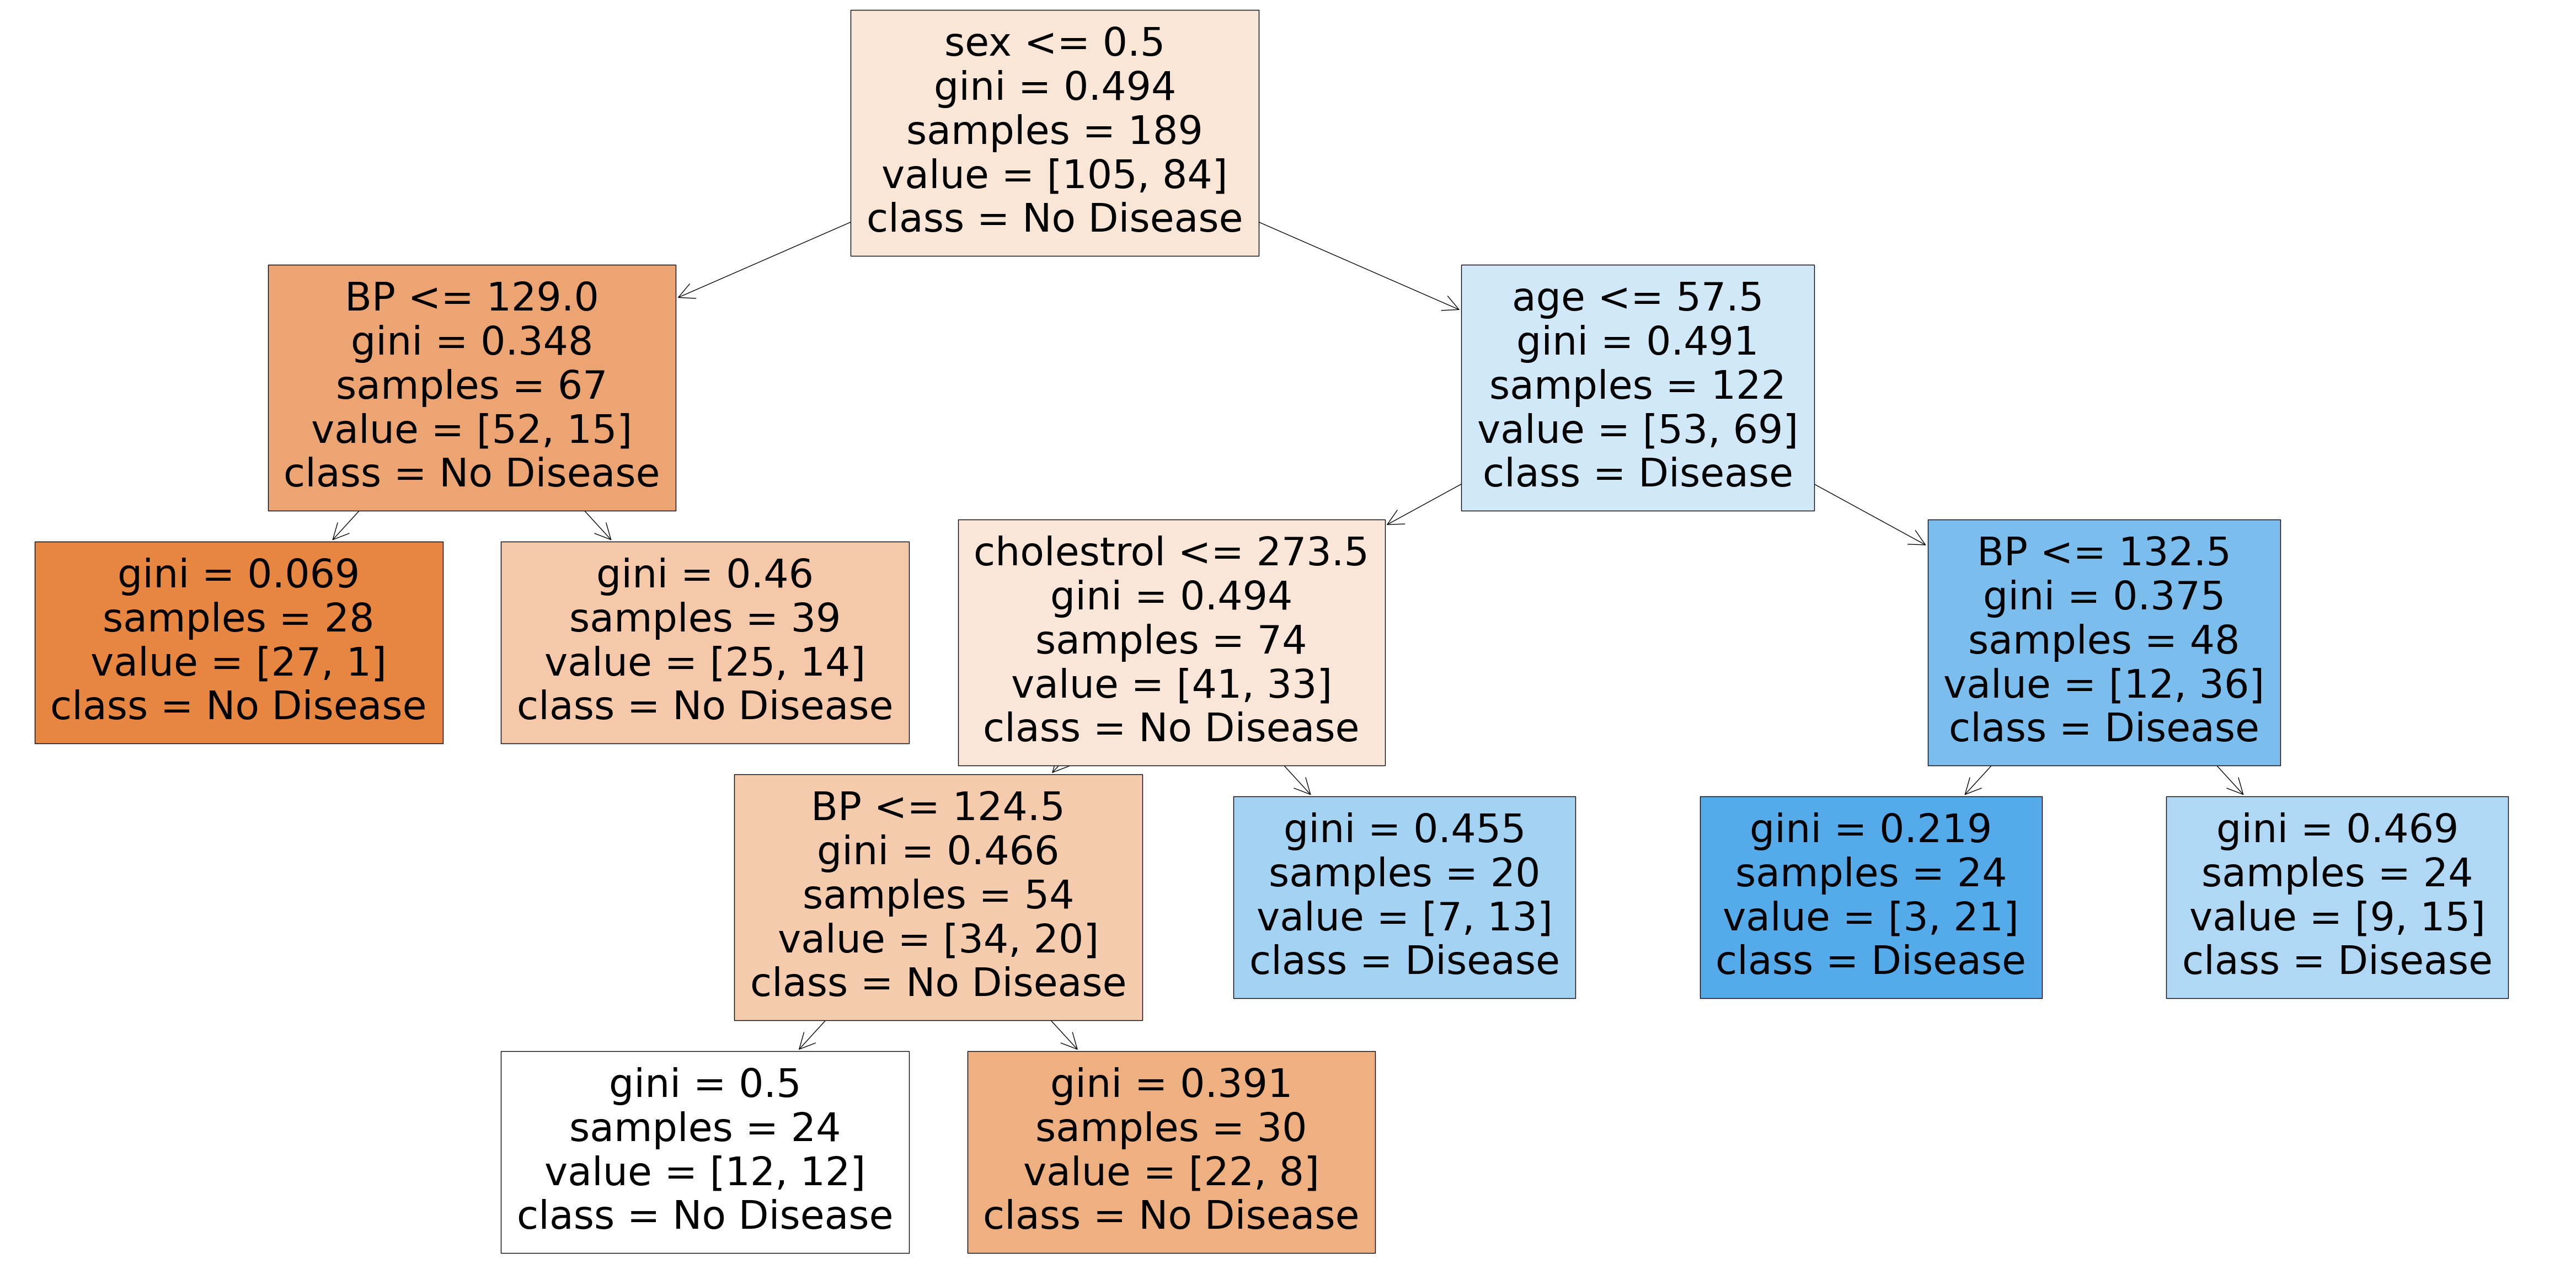

In [34]:
get_dt_graph(dt_4)

In [35]:
evaluate_model(dt_4)

Train set performance
0.7142857142857143
[[86 19]
 [35 49]]
------------------------------------------------------------
Test set performance
0.691358024691358
[[37  8]
 [17 19]]


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion': ['gini','entropy']
}

In [38]:
dt_5 = DecisionTreeClassifier(random_state=50)

In [39]:
grid_search = GridSearchCV(estimator=dt_5,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [40]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 4.48 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [43]:
grid = pd.DataFrame(grid_search.cv_results_)
grid.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008771      0.004775         0.004902        0.003875   
1       0.005021      0.000362         0.003140        0.000752   
2       0.005022      0.001554         0.002250        0.000431   
3       0.002746      0.000827         0.001501        0.000499   
4       0.004896      0.000220         0.002503        0.000491   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.583333   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.562500   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.595745           0.702128           0.744681         0.666888   
1           0.617021           0.723404           0.744681         0.677527   
2           0.617021           0.723404           0.744681         0.677527   
3           0.510638           0.595745           0.638298         0.582004   
4           0.553191           0.553191           0.553191         0.555519   

   std_test_score  rank_test_score  
0        0.059392                9  
1        0.057084                3  
2        0.057084                3  
3        0.045969               31  
4        0.004031               41

In [46]:
grid.sort_values(by= 'mean_test_score',axis=0,ascending=False,inplace=True)
grid.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
45       0.002635      0.000647         0.001387        0.000427   
40       0.003000      0.000707         0.001759        0.000437   
25       0.003257      0.000836         0.001889        0.000560   
1        0.005021      0.000362         0.003140        0.000752   
2        0.005022      0.001554         0.002250        0.000431   

   param_criterion param_max_depth param_min_samples_leaf  \
45         entropy              20                      5   
40         entropy              10                      5   
25         entropy               2                      5   
1             gini               2                     10   
2             gini               2                     20   

                                               params  split0_test_score  \
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.604167   
40  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.604167   
25  {'criterion': 'entropy', 'max_depth': 2, 'min_...           0.625000   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
45           0.638298           0.765957           0.723404         0.682957   
40           0.638298           0.765957           0.723404         0.682957   
25           0.617021           0.723404           0.744681         0.677527   
1            0.617021           0.723404           0.744681         0.677527   
2            0.617021           0.723404           0.744681         0.677527   

    std_test_score  rank_test_score  
45        0.064667                1  
40        0.064667                1  
25        0.057084                3  
1         0.057084                3  
2         0.057084                3

In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=50)

In [48]:
dt_final = grid_search.best_estimator_

In [49]:
evaluate_model(dt_final)

Train set performance
0.8359788359788359
[[88 17]
 [14 70]]
------------------------------------------------------------
Test set performance
0.6049382716049383
[[27 18]
 [14 22]]


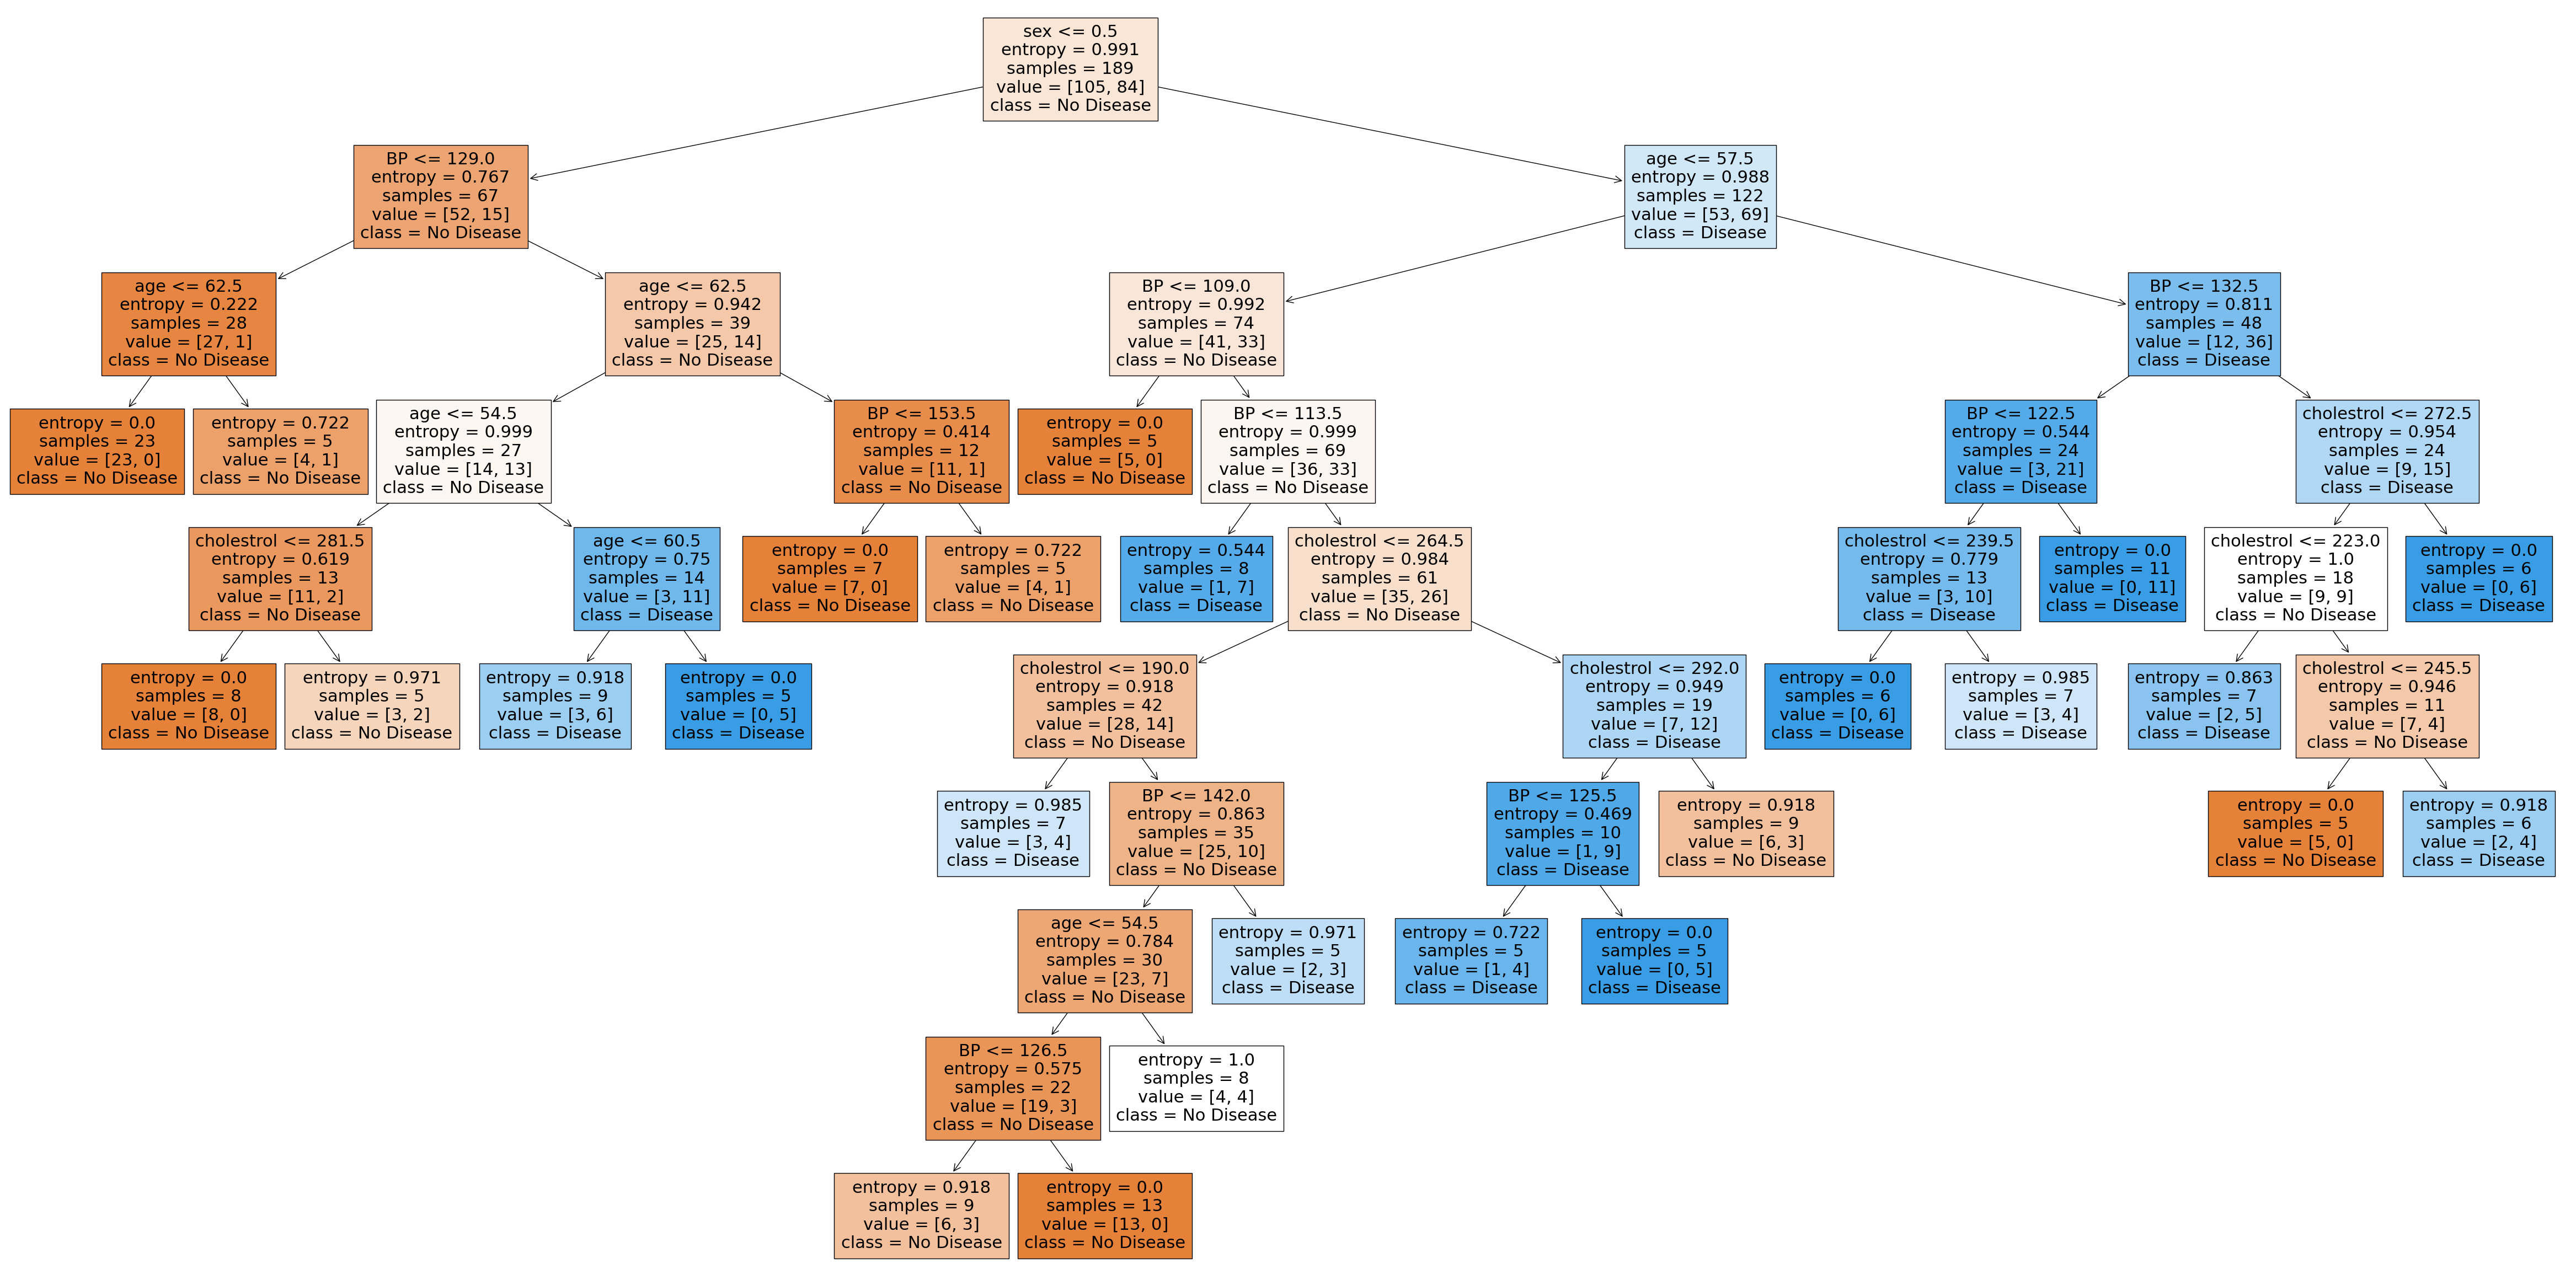

In [50]:
get_dt_graph(dt_final)

In [55]:
grid = pd.DataFrame(grid)

In [56]:
grid.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
45       0.002635      0.000647         0.001387        0.000427   
40       0.003000      0.000707         0.001759        0.000437   
25       0.003257      0.000836         0.001889        0.000560   
1        0.005021      0.000362         0.003140        0.000752   
2        0.005022      0.001554         0.002250        0.000431   

   param_criterion param_max_depth param_min_samples_leaf  \
45         entropy              20                      5   
40         entropy              10                      5   
25         entropy               2                      5   
1             gini               2                     10   
2             gini               2                     20   

                                               params  split0_test_score  \
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.604167   
40  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.604167   
25  {'criterion': 'entropy', 'max_depth': 2, 'min_...           0.625000   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.625000   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
45           0.638298           0.765957           0.723404         0.682957   
40           0.638298           0.765957           0.723404         0.682957   
25           0.617021           0.723404           0.744681         0.677527   
1            0.617021           0.723404           0.744681         0.677527   
2            0.617021           0.723404           0.744681         0.677527   

    std_test_score  rank_test_score  
45        0.064667                1  
40        0.064667                1  
25        0.057084                3  
1         0.057084                3  
2         0.057084                3

In [61]:
grid_search.best_estimator_.max_depth

10